<h1>Analysis of Premier League data - English Football League from 2010 to 2021<h1>

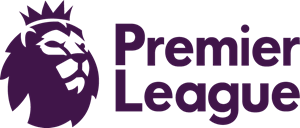


Analyzed by:
<li>Yuval Leizer</li>
<li>Rotem Sofer</li>
<li>Raz Herman</li>
</ul>

https://www.kaggle.com/pablohfreitas/all-premier-league-matches-20102021?select=df_full_premierleague.csv

In [1]:
# pip install plotly_express==0.4.0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly_express as px

In [3]:
url="https://raw.githubusercontent.com/YuLe33/Final-Project-df_full_premierleague1/main/data%20set/df_full_premierleague.csv"
data=pd.read_csv(url)
del(data['Unnamed: 0'],data['link_match'])
data["home_win"]=np.nan
data["date"]=pd.to_datetime(data.date)
data=data.sort_values(by="date")
data = data.reset_index(drop=True)

In [85]:
scors = data["result_full"].str.extract("(\d+)-(\d+)")
data["home_win"] =(scors[0]>scors[1]).astype(int)
tie=(scors[0]==scors[1])
win=scors[0]>scors[1]
lose=scors[0]<scors[1]
data.loc[tie,"home_win"] ="draw"
data.loc[win,"home_win"] ="win"
data.loc[lose,"home_win"] ="loss"

In [86]:
data[["season","date","home_team","away_team","result_ht","home_win"]]

,season,date,home_team,away_team,result_ht,home_win
0,10/11,2010-08-14,Aston Villa,West Ham United,2-0,win
1,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,draw
2,10/11,2010-08-14,Chelsea,West Bromwich Albion,2-0,win
3,10/11,2010-08-14,Sunderland,Birmingham City,1-0,draw
4,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,draw
...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-0,loss
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,draw
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,draw
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,loss


#### In our data we checked statistics for many importnant Ingredients that the premier league is built on.
#### as you can see at our data we checked for the past 10 years how the league has evolved and progressed in many ways, for example how many shoots has taken, what are the parameters to succeed , how many home wins has for the lead team in the past 10 years and how covid-19 influence on the Performence in the league.

# Insight number one-The parameters that show how homeliness improves player performance.

In [87]:
home, away = data['result_full'].str.split('-',1).str
data['home_goals'] = home
data['away_goals'] = away
data['home_goals'] = data['home_goals'].astype(int)
data['away_goals'] = data['away_goals'].astype(int)

C:\Users\laser\AppData\Local\Temp/ipykernel_11956/3713876565.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  home, away = data['result_full'].str.split('-',1).str


In [88]:
data['home_win_score'] = (data.loc[:,'home_goals']-data.loc[:,'away_goals'])>0
data['away_win_score'] = (data.loc[:,'away_goals']-data.loc[:,'home_goals'])>0
data['home_win_score'] = data['home_win_score'].astype(int)
data['away_win_score'] = data['away_win_score'].astype(int)

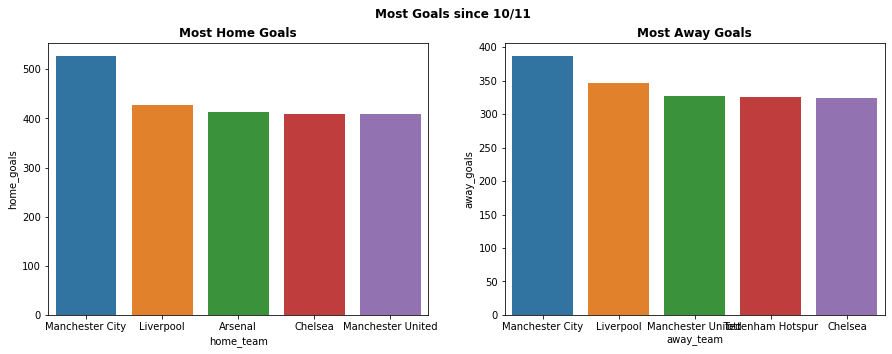

In [89]:
total_home_goals = data.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).reset_index()
total_away_goals = data.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).reset_index()
# sketch = px.bar(total_home_goals.head(15),x='home_team', y='home_goals',color='home_team')
# sketch.update_layout(title='Most Home Goals since 10/11',xaxis_title='Team',yaxis_title='Goals')
# sketch.show()
# total_home_goals = sns.load_dataset("total_home_goals")
fig, axes = plt.subplots(figsize=(15,5), ncols=2)
plt.subplots_adjust(wspace = 0.2)
fig.suptitle("Most Goals since 10/11",fontweight ="bold")
best_home_goals = sns.barplot(x="home_team", y="home_goals", data=total_home_goals.head(),ax=axes[0])
best_home_goals.set_title('Most Home Goals',fontweight ="bold")
best_away_goals = sns.barplot(x="away_team",y='away_goals',data=total_away_goals.head(),ax=axes[1])
best_away_goals.set_title('Most Away Goals',fontweight ="bold")
plt.show()



#### We can learn that for the last 10 years ,manchester city has the most home goals record.
#### We can conclude that the impact of the home audience leads to higher group achievements and better performance, for thr past 10 years.

In [90]:
# total_away_goals = data.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).reset_index()
# sketch_2 = px.bar(total_away_goals.head(15),x='away_team',y='away_goals',color='away_team')
# sketch_2.update_layout(title='Most Away Goals sincs 10/11',xaxis_title='Team',yaxis_title='Goals')
# sketch_2.show()

In [91]:
home_corners=data["home_corners"].mean()
away_corners=data["away_corners"].mean()
home_possession=data["home_possession"].mean()
away_possession=data["away_possession"].mean()
home_shots=data["home_shots"].mean()
away_shots=data["away_shots"].mean()
home_shots_on_target=data["home_shots_on_target"].mean()
away_shots_on_target=data["away_shots_on_target"].mean()
goal_home_ft=data["goal_home_ft"].mean()
goal_away_ft=data["goal_away_ft"].mean()

In [92]:
d = [['home_team',home_corners,home_possession,home_shots,home_shots_on_target,goal_home_ft], ['away_team',away_corners,away_possession,away_shots,away_shots_on_target,goal_away_ft]]
df3 = pd.DataFrame(d, columns = ["main","corners","possession","shots","shots_on_target","goal"])
df3

,main,corners,possession,shots,shots_on_target,goal
0,home_team,5.94570,51.230393,14.545455,4.820885,1.535627
1,away_team,4.74742,48.769607,11.694103,3.949140,1.200737


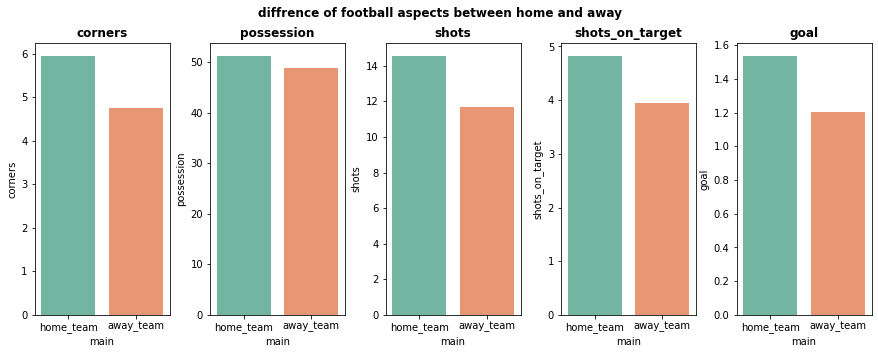

In [93]:
fig, axes = plt.subplots(figsize=(15,5), ncols=5)
plt.subplots_adjust(wspace = 0.3)
fig.suptitle("diffrence of football aspects between home and away",fontweight ="bold")
a=sns.barplot(x="main", y="corners",palette="Set2",ci = None,data=df3,ax=axes[0])
a.set_title("corners",fontweight ="bold")
# a.bar_label(a.containers[0])
b=sns.barplot(x="main", y="possession",palette="Set2",ci = None,data=df3, ax = axes[1])
b.set_title("possession",fontweight ="bold")
# b.bar_label(b.containers[0])
c=sns.barplot(x="main", y="shots",palette="Set2", ci= None,data=df3, ax = axes[2])
c.set_title("shots",fontweight ="bold")
# c.bar_label(c.containers[0])
d=sns.barplot(x="main", y="shots_on_target",palette="Set2",ci = None, data=df3,ax=axes[3])
d.set_title("shots_on_target",fontweight ="bold")
#  d.bar_label(d.containers[0])
e=sns.barplot(x="main", y="goal",palette="Set2",ci = None,data=df3,ax=axes[4])
e.set_title("goal",fontweight ="bold")
# e.bar_label(e.containers[0])
plt.show()

#### In our data analysis we show how home games are reflected in player improvement.for example, we chose to analyze the following indicators, such as the amount of ball possession in home / away games The amount of kicks per frame, key positions that affect the game and more.With the help of these metrics we have come to our first insight that these parameters are better reflected and result in the improvement of the players in the home games in a better way than in the away games.

# Insight Number two - home team vs away team wins. 

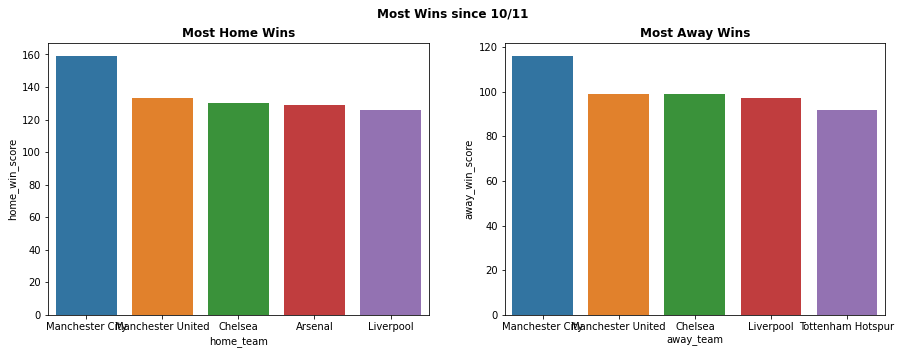

In [94]:
total_home_wins = data.groupby('home_team')['home_win_score'].sum().sort_values(ascending=False).reset_index()
total_away_wins = data.groupby('away_team')['away_win_score'].sum().sort_values(ascending=False).reset_index()
# home_wins_sketch = px.bar(total_home_wins.head(15),x='home_team',y='home_win_score',color='home_team')
# home_wins_sketch.update_layout(title='Most Home Wins since 10/11',xaxis_title='Team',yaxis_title='Wins')
# home_wins_sketch.show()
fig, axes = plt.subplots(figsize=(15,5), ncols=2)
plt.subplots_adjust(wspace = 0.2)
fig.suptitle("Most Wins since 10/11",fontweight ="bold")
best_home_wins = sns.barplot(x="home_team", y="home_win_score", data=total_home_wins.head(),ax=axes[0])
best_home_wins.set_title('Most Home Wins',fontweight ="bold")
best_away_wins = sns.barplot(x="away_team",y='away_win_score',data=total_away_wins.head(),ax=axes[1])
best_away_wins.set_title('Most Away Wins',fontweight ="bold")
plt.show()

In [95]:
# total_away_wins = data.groupby('away_team')['away_win_score'].sum().sort_values(ascending=False).reset_index()
# away_wins_sketch = px.bar(total_away_wins.head(15),x='away_team',y='away_win_score',color='away_team')
# away_wins_sketch.update_layout(title='Most Away Wins since 10/11',xaxis_title='Team',yaxis_title='Wins')
# away_wins_sketch.show()

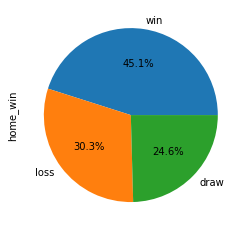

In [96]:
home=data["home_win"].value_counts().plot.pie(autopct='%1.1f%%')

#### Further analysis of our data and with the help of our conclusions from the first insight, we learn that the victories vary according to the parameters we analyzed in our first insight.We can conclude that there is a direct connection between home victory and player improvement, this  caused as a result of various variables such as home crowd which was very significant before the covid-19 period, and more can be seen that indeed players performed better when the team played home game which leads us to insight The number 2 that it actually shows that victories occur not just because of the parameters that we analyzed, moreover these victories occur because of the home games effect.

As we found that the last game as played before covid 19 arrive to England was at 1-3-2020


# Insight number three - Covid-19 effect's on home winning's 

In [97]:
ch=data.groupby(["season"])[["home_corners","home_possession","home_shots","home_shots_on_target","goal_home_ft","away_corners","away_possession","away_shots","away_shots_on_target","goal_away_ft"]].mean()

In [98]:
corr_matrix=ch.corr()
ch.style.background_gradient(cmap='Blues')

,home_corners,home_possession,home_shots,home_shots_on_target,goal_home_ft,away_corners,away_possession,away_shots,away_shots_on_target,goal_away_ft
season,,,,,,,,,,
10/11,5.989474,50.567632,16.173684,5.134211,1.623684,4.965789,49.432368,12.905263,4.094737,1.173684
11/12,6.494737,51.402105,16.092105,5.115789,1.589474,4.873684,48.597895,12.568421,4.152632,1.215789
12/13,6.315789,50.919211,15.565789,5.084211,1.557895,4.826316,49.080789,12.223684,4.150000,1.239474
13/14,6.097368,51.487895,14.994737,5.052632,1.573684,4.676316,48.512105,11.950000,3.907895,1.194737
14/15,6.044737,51.653158,14.663158,4.718421,1.473684,4.668421,48.346842,11.321053,3.678947,1.092105
15/16,5.934037,51.709235,14.335092,4.638522,1.493404,4.865435,48.290765,11.390501,3.886544,1.211082
16/17,5.673684,50.810000,14.068421,4.800000,1.597368,4.742105,49.190000,11.542105,3.852632,1.202632
17/18,5.747368,51.666579,13.605263,4.628947,1.531579,4.544737,48.333421,10.863158,3.763158,1.147368
18/19,5.726316,51.616053,14.171053,4.784211,1.568421,4.555263,48.383947,11.178947,3.928947,1.252632


In [99]:
#  data[data.loc[:,"date"]=="2020-3"]

In [100]:
before_covid=data.iloc[0:3697]

The desicion to open the doors of the football stadium had happen at the 7 of may, due to all of the games of season 20/21 we have in the data set is without crowd

In [101]:
data[data.loc[:,"season"]=="20/21"]

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_win,home_goals,away_goals,home_win_score,away_win_score
3799,20/21,2020-09-12,Fulham,Arsenal,0-3,0-1,7.0,2.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,loss,0,3,0,1
3800,20/21,2020-09-12,West Ham United,Newcastle United,0-2,0-0,18.0,8.0,13.0,2.0,...,NaN,NaN,NaN,NaN,NaN,loss,0,2,0,1
3801,20/21,2020-09-12,Liverpool,Leeds United,4-3,3-2,11.0,9.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,win,4,3,1,0
3802,20/21,2020-09-12,Crystal Palace,Southampton,1-0,1-0,22.0,7.0,14.0,4.0,...,NaN,NaN,NaN,NaN,NaN,win,1,0,1,0
3803,20/21,2020-09-13,West Bromwich Albion,Leicester City,0-3,0-0,13.0,2.0,12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,loss,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-2,1-0,5.0,6.0,14.0,4.0,...,15.0,0.78,0.59,5.0,61.7,loss,1,2,0,1
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,1-1,16.0,2.0,5.0,2.0,...,7.0,0.65,0.65,0.0,47.4,draw,1,1,0,0
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,0-0,21.0,9.0,11.0,1.0,...,-17.0,0.35,0.69,-9.0,33.3,draw,0,0,0,0
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,0-1,13.0,9.0,10.0,3.0,...,-12.0,0.37,0.59,-6.0,28.4,loss,0,1,0,1


In [102]:
covid_times=data.iloc[3698:]

In [103]:
before_covid_all=len(before_covid["home_win"])
before_covid_w=before_covid["home_win"][before_covid.loc[:,"home_win"]=="win"].count()/before_covid_all*100
before_covid_d=before_covid["home_win"][before_covid.loc[:,"home_win"]=="draw"].count()/before_covid_all*100
before_covid_l=before_covid["home_win"][before_covid.loc[:,"home_win"]=="loss"].count()/before_covid_all*100

In [104]:
covid_all_games=len(covid_times["home_win"])
covid_w=covid_times["home_win"][covid_times.loc[:,"home_win"]=="win"].count()/covid_all_games*100
covid_d=covid_times["home_win"][covid_times.loc[:,"home_win"]=="draw"].count()/covid_all_games*100
covid_l=covid_times["home_win"][covid_times.loc[:,"home_win"]=="loss"].count()/covid_all_games*100

In [105]:
a = [['before_covid',before_covid_w,before_covid_d,before_covid_l], ['covid_times', covid_w,covid_d,covid_l]]
df = pd.DataFrame(a, columns = ["Times",'W', 'D',"L"])
df

,Times,W,D,L
0,before_covid,45.604544,24.722748,29.672708
1,covid_times,39.784946,23.118280,37.096774


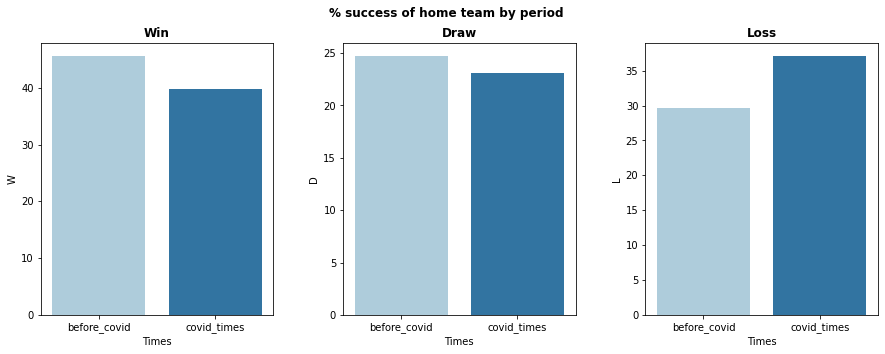

In [106]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.3)
fig.suptitle("% success of home team by period",fontweight ="bold")
a=sns.barplot(x="Times", y="W",palette=sns.color_palette("Paired"),ci = None, estimator = sum, data=df,ax=axes[0])
a.set_title("Win",fontweight ="bold")
# a.bar_label(a.containers[0])
b=sns.barplot(x="Times", y="D",palette=sns.color_palette("Paired"),ci = None, estimator = sum, data=df, ax = axes[1])
b.set_title("Draw",fontweight ="bold")
# b.bar_label(b.containers[0])
c=sns.barplot(x="Times", y="L",palette=sns.color_palette("Paired"),ci = None, estimator = sum, data=df, ax = axes[2])
c.set_title("Loss",fontweight ="bold")
# c.bar_label(c.containers[0])
plt.show()

#### Following the covid-19 epidemic we see from the analysis we performed that the covid-19 epidemic has led to a situation of closures and a ban on public entry to the Home and Away games. To this end, we learn that due to the non-attendance of the audience at the games, the player's performance decreased accordingly by up to 7%, which led to a decrease in the number of home victories, while we learn that there is a direct connection between the audience and the players' performance.From this we deduced our number 3 insight, That following the closure of the stadiums to the fans ,the performance of the players decreased accordingly and so did the number of home wins which led to a negative downward trend in the analysis of the 20/21 season that called "covid-19 season".


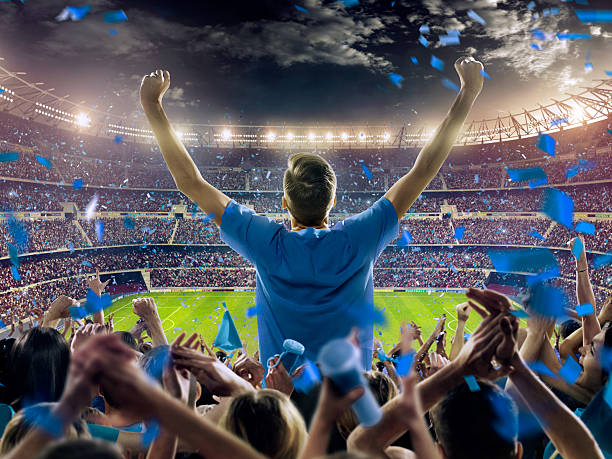

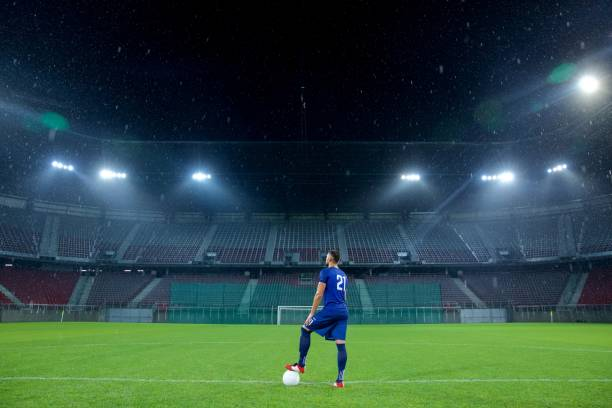